In [1]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm
import time
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

C:\Users\ratikantlab\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ratikantlab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ratikantlab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Uniform  sampling:   sample  the  domain  with  a  uniform  probability density to estimate $E[g(x)]$.

In [2]:
# Uniform Random Variable Generation
np.random.seed(0)
def generate_variate_uniform():
  u=np.random.randint(0,200)
  z=-1 + u*0.01 #for grid size
 
  return round(z,2)#Round off to two decimal places

In [3]:
# Generating the sample vectors
def generate_sample(dim, number_of_samples):
    num_cols = 10+10*number_of_samples + 1  # Total number of columns (including the first one)
    X = np.zeros((dim, num_cols))
    
    # Generate the first sample for each dimension
    for i in range(dim):
        X[i, 0] = generate_variate_uniform()
    
    # Generate the rest of the samples
    for j in range(1, num_cols):
        for i in range(dim):
            X[i, j] = generate_variate_uniform()
    
    return X
X_example=generate_sample(2,5)
#print(X_example)

In [4]:
# Define the Given function
def g1(X):
    return abs(X[0])
print(X_example[:,1])
# print(g1(X_example[:,1]))
def g2(X):
    return X.shape[0] - np.sum(X ** 2)
print(g2(X_example[:,1]))

[0.17 0.92]
1.1246999999999998


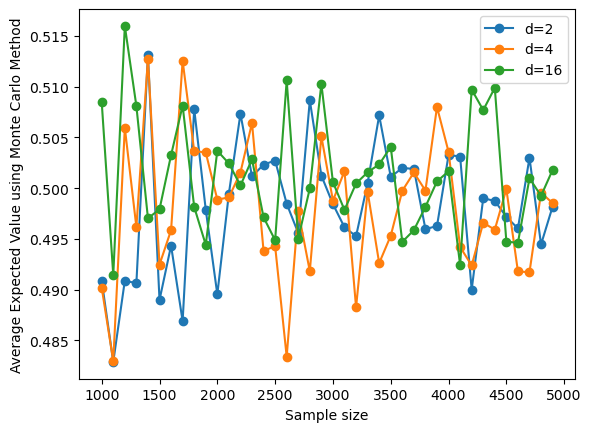

In [5]:
#The Expected Value for function g1 with varying the sample size
sample_sizes = range(1000, 5000, 100)
dimensions = [2, 4, 16]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample(dim, sample_size)
        s = np.mean([g1(X[:, j]) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()



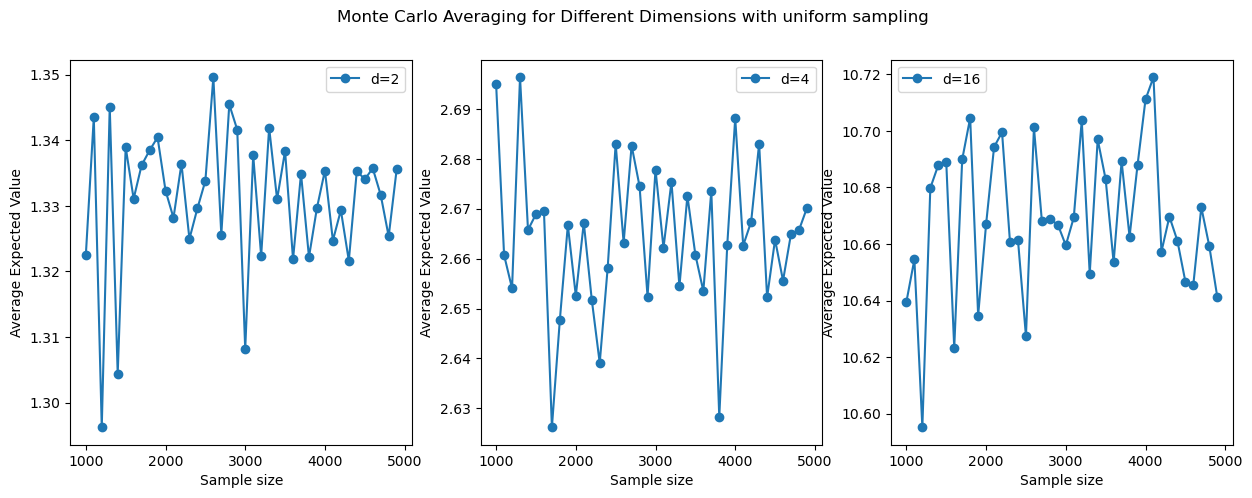

In [6]:
#The Expected Value for function g2 with varying the sample size

sample_sizes = range(1000, 5000, 100)
dimensions = [2, 4, 16]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, dim in enumerate(dimensions):
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample(dim, sample_size)
        s = np.mean([g2(X[:, j]) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    axs[i].plot(sample_sizes, expectations, marker='o', label=f"d={dim}")
    axs[i].set_xlabel("Sample size")
    axs[i].set_ylabel("Average Expected Value")
    axs[i].legend()

plt.suptitle("Monte Carlo Averaging for Different Dimensions with uniform sampling")
plt.show()

# Importance sampling:  sample the domain with a probability density $q(x)=c||x||_1$ 

In [7]:
import numba 
from fractions import Fraction

@numba.jit()
def conditional_pdf_q1(X, c, d):
    grid = np.concatenate((np.arange(-1, -0.8, 0.01), np.arange(-0.01, 0.01, 0.01), np.arange(0.8, 1.0, 0.01)))
    pdf = np.zeros(len(grid))
    for i, x in enumerate(grid):
        X[d] = x
        pdf[i] = np.linalg.norm(X, 1) * c
    m = np.max(pdf)
    while True:
        index = np.random.randint(0, len(pdf))
        if np.random.uniform(0, 1) * m < pdf[index]:
            X[d] = grid[index]
            break
    return X


In [8]:
# Gibbs sampling with pdf q(x)=c||x||_1 on a 2dimensional cube
@numba.jit()
def generate_sample_cond_q1(dim, num_samples, c):
    X = np.zeros((dim, 10 + 10*num_samples + 1))

    for i in range(dim):
        X[:, 0] = conditional_pdf_q1(X[:, 0], c, i)

    for j in range(1, X.shape[1]):
        x = X[:, j-1]
        for i in range(dim):
            x = conditional_pdf_q1(x, c, i)
        X[:, j] = x
#         pl.scatter(x[0], x[1], color='blue')
#         display.clear_output(wait=True)
#         display.display(pl.gcf())
#         plt.title("Gibbs Sampling with pdf q(x)=c||x|| on 2D cube")
    return X
X_sampl=generate_sample_cond_q1(2,20,1/4)
#print(X_sampl)

E[g(x)]= 0.49945659585426366


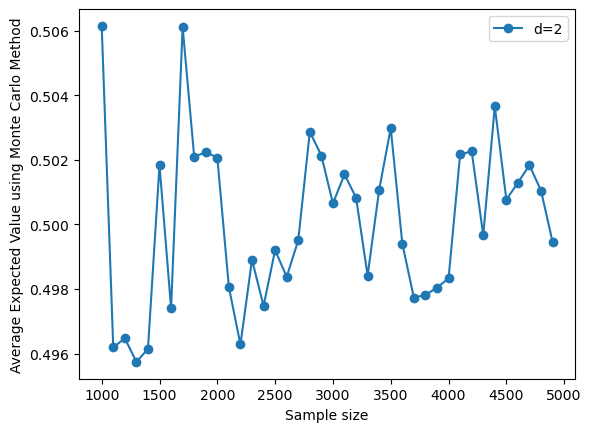

In [9]:
sample_sizes = range(1000, 5000, 100)
dimensions = [2]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample_cond_q1(dim, sample_size,1/4)
        s = np.mean([(g1(X[:,j]))/(np.linalg.norm(X[:,j],1)) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")
print("E[g(x)]=",s)
plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()


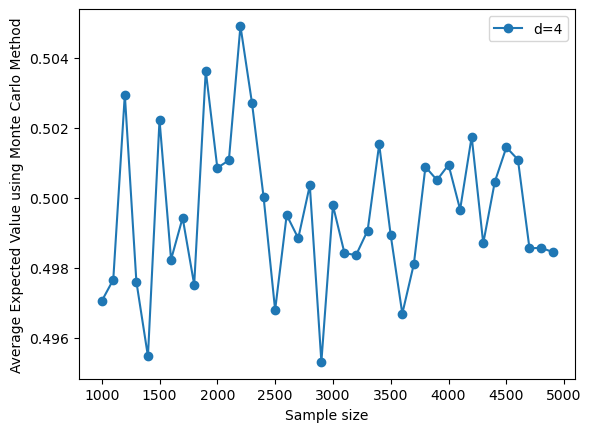

In [10]:

sample_sizes = range(1000, 5000, 100)
dimensions = [4]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample_cond_q1(dim, sample_size,1/32)
        s = np.mean([(2*g1(X[:,j]))/(np.linalg.norm(X[:,j],1)) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()

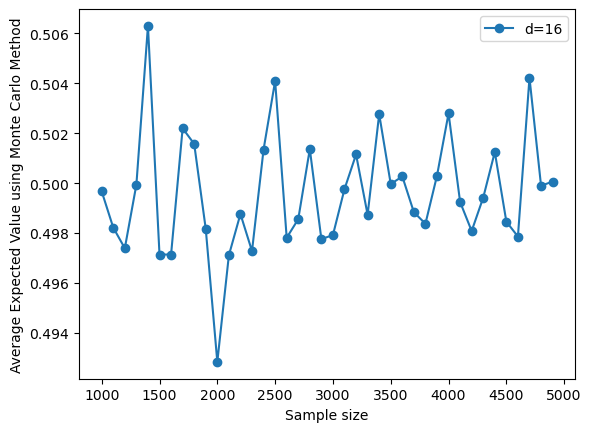

In [11]:
sample_sizes = range(1000, 5000, 100)
dimensions = [16]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample_cond_q1(dim, sample_size,1/524288)
        s = np.mean([(8*g1(X[:,j]))/(np.linalg.norm(X[:,j],1)) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()


# Importance sampling: sample the domain with a probability density $q(x)=c|g(x)|$
  

In [12]:
@numba.jit()
def conditional_pdf_q2(X, c, d):
    grid = np.concatenate((np.arange(-1, -0.8, 0.01), np.arange(-0.01, 0.01, 0.01), np.arange(0.8, 1.0, 0.01)))
    pdf = np.zeros(len(grid))
    for i, x in enumerate(grid):
        X[d] = x
        pdf[i] = g2(X)*c
    m = np.max(pdf)
    while True:
        index = np.random.randint(0, len(pdf))
        if np.random.uniform(0, 1) * m < pdf[index]:
            X[d] = grid[index]
            break
    return X


In [13]:
# Gibbs sampling with pdf q(x)=c|g(x)| on a 2 dimensional cube
@numba.jit()
def generate_sample_cond_q2(dim, num_samples, c):
    X = np.zeros((dim, 10 + 10*num_samples + 1))

    for i in range(dim):
        X[:, 0] = conditional_pdf_q2(X[:, 0], c, i)

    for j in range(1, X.shape[1]):
        x = X[:, j-1]
        for i in range(dim):
            x = conditional_pdf_q2(x, c, i)
        X[:, j] = x
#         pl.scatter(x[0], x[1], color='blue')
#         display.clear_output(wait=True)
#         display.display(pl.gcf())
#         plt.title("Gibbs Sampling with pdf q(x)=c|g(x)| on 2D cube")
    return X
X_sampl=generate_sample_cond_q2(2,30,1/4)

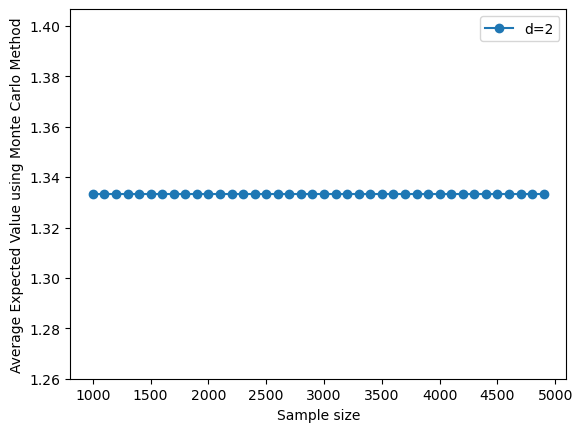

In [14]:
sample_sizes = range(1000, 5000, 100)
dimensions = [2]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample_cond_q2(dim, sample_size,3/16)
        s = np.mean([( g2(X[:,j])*4 )  / (3*g2(X[:,j])) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()

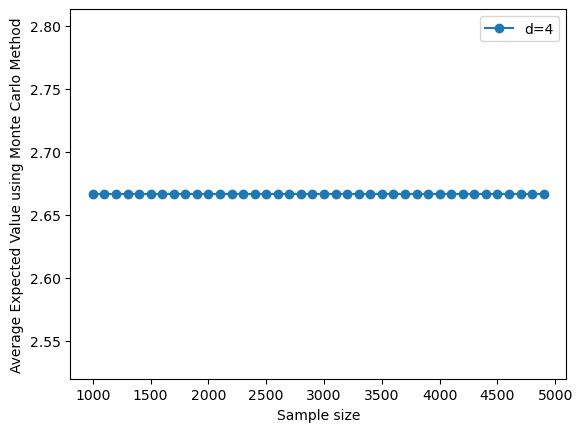

In [15]:
sample_sizes = range(1000, 5000, 100)
dimensions = [4]

for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        X = generate_sample_cond_q2(dim, sample_size,3/128)
        s = np.mean([( g2(X[:,j])*8 )  / (3*g2(X[:,j])) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()

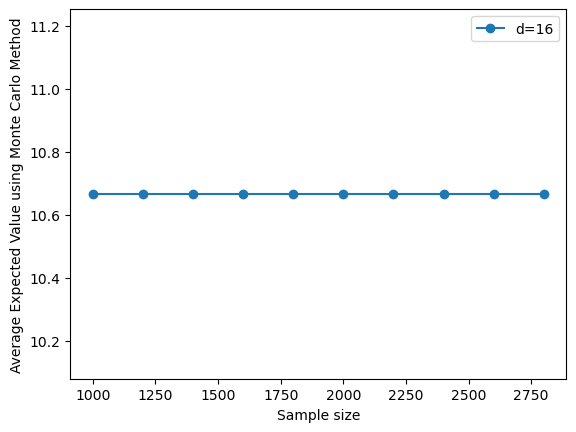

In [19]:
sample_sizes = range(1000, 3000, 200)
dimensions = [16]
n=2**21
for dim in dimensions:
    expectations = []
    for sample_size in sample_sizes:
        
        X = generate_sample_cond_q2(dim, sample_size,3/n)
        s = np.mean([( g2(X[:,j])*32 )  / (3*g2(X[:,j])) for j in range(10, X.shape[1], 10)])
        expectations.append(s)
    plt.plot(sample_sizes, expectations, marker='o', label=f"d={dim}")

plt.xlabel("Sample size")
plt.ylabel("Average Expected Value using Monte Carlo Method")
plt.legend()
plt.show()

###### 